In [1]:
%matplotlib inline
from pycocotools.coco import COCO

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab
import random
import json
import csv
from shutil import copyfile

pylab.rcParams['figure.figsize'] = (15.0, 20.0)

In [2]:
dataDir='..'
dataType='trainTrafficLISA'
#dataType='valTraffic'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

# load COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

# Map category ids to names
catIds = coco.getCatIds()

catNames = dict()
for i in range(len(catIds)):
    catNames[str(cats[i]['id'])] = cats[i]['name']

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


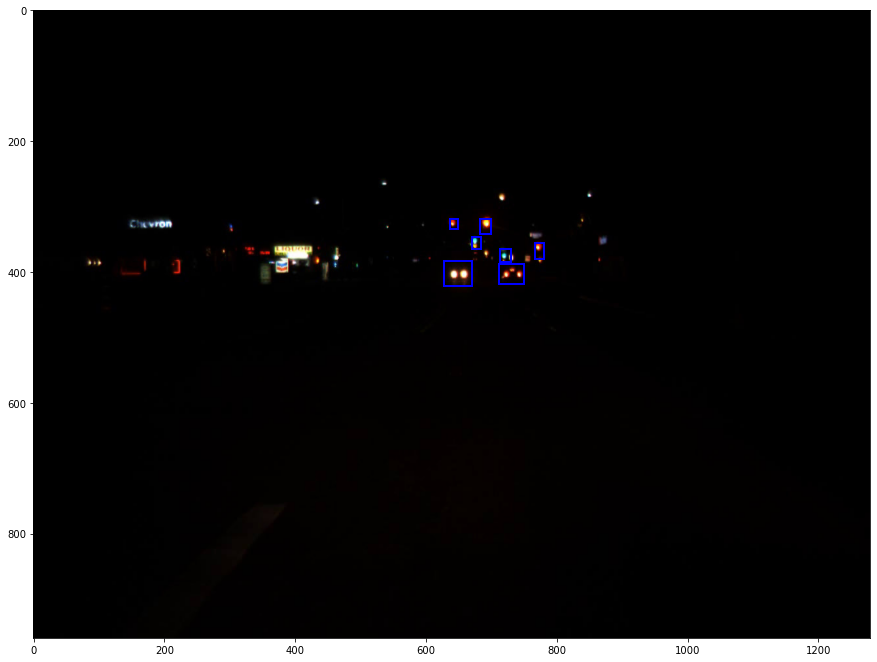

In [3]:
# Show selected images and draw boxes
dataType='trainTrafficLISA'
names = ['cars', 'traffic light']
catIds = coco.getCatIds(catNms=names)
imgIds = coco.getImgIds(catIds=catIds )
imgIds = imgIds[2:3]
#print('Number of images: ' + str(len(img)))

# Load annotations
annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)

# Get images
img = coco.loadImgs(imgIds)
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img[0]['file_name']))
fig, ax = plt.subplots()

# Colours for boxes
colours = {1: 'red', 3: 'blue', 10: 'green'}

for ann in anns:
    # Draw box
    box = ann['bbox']
    

    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2,edgecolor="blue", facecolor='none')
    ax.add_patch(bb)

ax.imshow(I)
#ax.axis('off')
plt.show()